# Ensemble model on churn dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 20,18

In [3]:
df = pd.read_csv('churn.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Cleaning and Performing EDA

In [5]:
sum(df.duplicated())

0

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Replacing all the similar values in different columns with the same name

In [9]:
df['PhoneService'] = df['PhoneService'].replace('No','0')
df['MultipleLines'] = df['MultipleLines'].replace('No phone service','0')
df['InternetService'] = df['InternetService'].replace('No','0')
df['OnlineSecurity'] = df['OnlineSecurity'].replace('No internet service','0')
df['OnlineBackup'] = df['OnlineBackup'].replace('No internet service','No')
df['DeviceProtection'] = df['DeviceProtection'].replace('No internet service','0')
df['TechSupport'] = df['TechSupport'].replace('No internet service','0')
df['StreamingTV'] = df['StreamingTV'].replace('No internet service','0')
df['StreamingMovies'] = df['StreamingMovies'].replace('No internet service','0')

### Converting the categorical column to numerical using Label Encoder

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df['gender_encoded'] = le.fit_transform(df['gender'])
df['Partner_encoded'] = le.fit_transform(df['Partner'])
df['Dependents_encoded'] = le.fit_transform(df['Dependents'])
df['PhoneService_encoded'] = le.fit_transform(df['PhoneService'])
df['MultipleLines_encoded'] = le.fit_transform(df['MultipleLines'])
df['InternetService_encoded'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity_encoded'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup_encoded'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection_encoded'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport_encoded'] = le.fit_transform(df['TechSupport'])
df['StreamingTV_encoded'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies_encoded'] = le.fit_transform(df['StreamingMovies'])
df['Contract_encoded'] = le.fit_transform(df['Contract'])
df['PaperlessBilling_encoded'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod_encoded'] = le.fit_transform(df['PaymentMethod'])
df['PaymentMethod_encoded'] = le.fit_transform(df['PaymentMethod'])
df['Churn_encoded'] = le.fit_transform(df['Churn'])

### Converting the TotalCharges column to float type

In [12]:
df['TotalCharges_encoded'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
df = df[['gender_encoded', 'SeniorCitizen', 'Partner_encoded', 'Dependents_encoded',
       'tenure', 'PhoneService_encoded', 'MultipleLines_encoded',
       'InternetService_encoded', 'OnlineSecurity_encoded',
       'OnlineBackup_encoded', 'DeviceProtection_encoded',
       'TechSupport_encoded', 'StreamingTV_encoded', 'StreamingMovies_encoded',
       'Contract_encoded', 'PaperlessBilling_encoded',
       'PaymentMethod_encoded', 'MonthlyCharges', 'TotalCharges_encoded', 'Churn_encoded']]

In [14]:
df.isnull().sum()

gender_encoded               0
SeniorCitizen                0
Partner_encoded              0
Dependents_encoded           0
tenure                       0
PhoneService_encoded         0
MultipleLines_encoded        0
InternetService_encoded      0
OnlineSecurity_encoded       0
OnlineBackup_encoded         0
DeviceProtection_encoded     0
TechSupport_encoded          0
StreamingTV_encoded          0
StreamingMovies_encoded      0
Contract_encoded             0
PaperlessBilling_encoded     0
PaymentMethod_encoded        0
MonthlyCharges               0
TotalCharges_encoded        11
Churn_encoded                0
dtype: int64

### Removing the null values from TotalCharges_encoded

In [15]:
df = df.dropna(how='any')

In [16]:
df

,gender_encoded,SeniorCitizen,Partner_encoded,Dependents_encoded,tenure,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,MonthlyCharges,TotalCharges_encoded,Churn_encoded
0,0,0,1,0,1,0,0,1,1,1,1,1,1,1,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,0,2,1,1,1,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,1,1,2,1,1,1,1,1,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,0,2,2,1,1,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,1,2,1,0,1,1,1,1,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,1,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,2,1,1,2,1,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,1,2,0,1,1,1,1,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,2,1,0,1,1,1,1,0,1,3,74.40,306.60,1


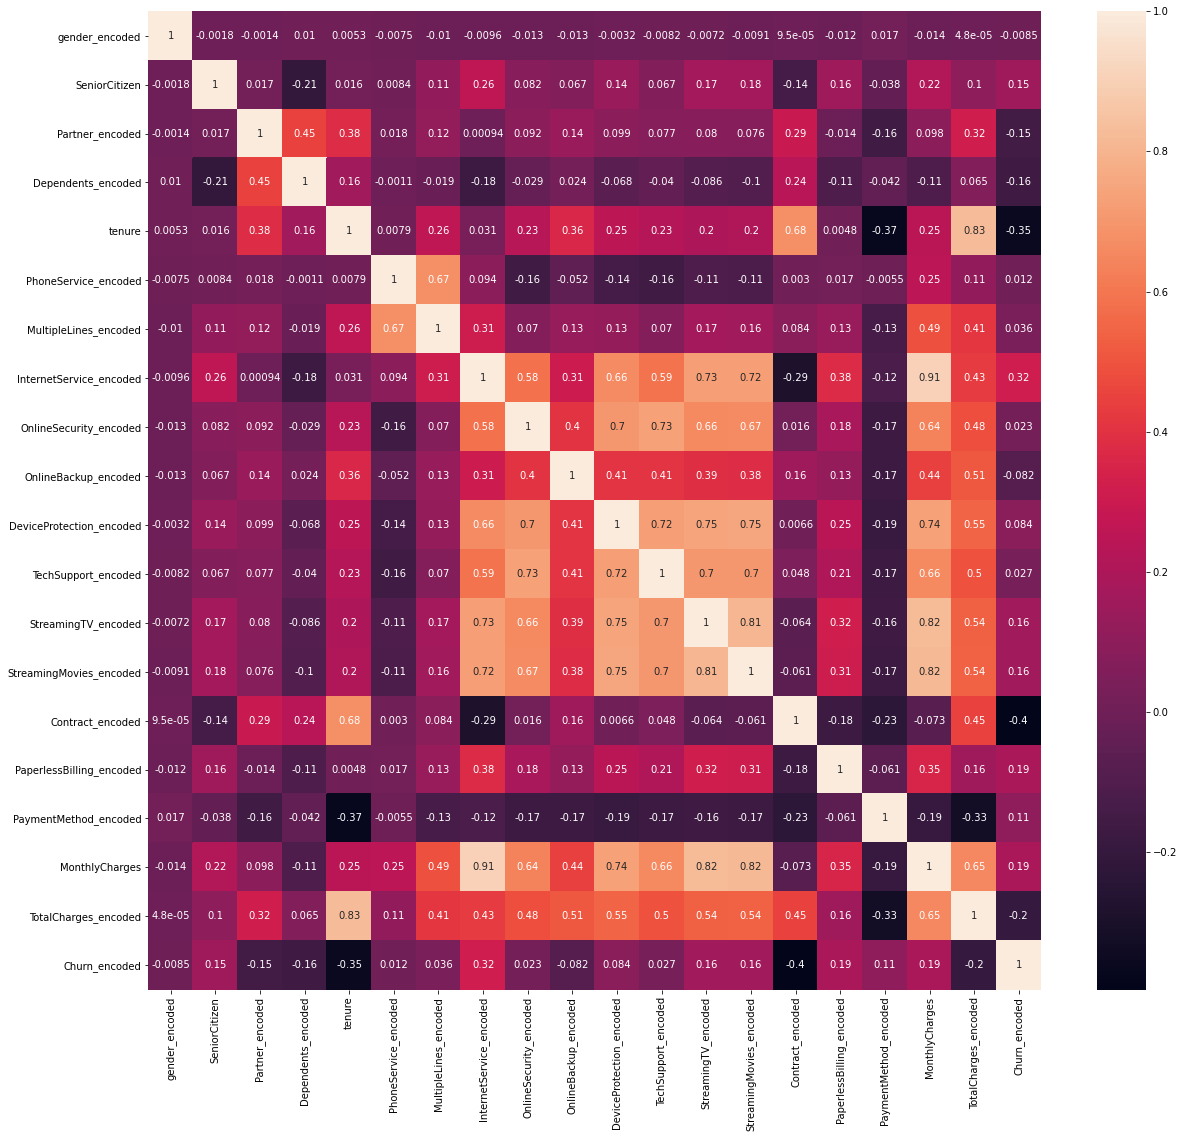

In [17]:
sns.heatmap(df.corr(), annot = True)

# Feature Selection

### Using Extra Trees Classifier

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

In [19]:
X = df[['gender_encoded', 'SeniorCitizen', 'Partner_encoded', 'Dependents_encoded',
       'tenure', 'PhoneService_encoded', 'MultipleLines_encoded',
       'InternetService_encoded', 'OnlineSecurity_encoded',
       'OnlineBackup_encoded', 'DeviceProtection_encoded',
       'TechSupport_encoded', 'StreamingTV_encoded', 'StreamingMovies_encoded',
       'Contract_encoded', 'PaperlessBilling_encoded',
       'PaymentMethod_encoded', 'MonthlyCharges', 'TotalCharges_encoded']]
Y = df['Churn_encoded']

In [20]:
model = ExtraTreesClassifier(n_estimators = 10)
model.fit(X,Y.ravel())
print(model.feature_importances_)

[0.03699164 0.0260258  0.0290553  0.02051286 0.15393081 0.00358219
 0.0294948  0.05235136 0.04398929 0.02485797 0.03310581 0.03341898
 0.02069442 0.03076102 0.08788296 0.02836953 0.06478434 0.1282994
 0.15189152]


Selecting the columns with the highest feature importance given above, and 
ignoring Dependents_encoded, PhoneService_encoded and StreamingTV_encoded

In [21]:
X = df[['gender_encoded', 'SeniorCitizen', 'Partner_encoded', 
       'tenure', 'MultipleLines_encoded',
       'InternetService_encoded', 'OnlineSecurity_encoded',
       'OnlineBackup_encoded', 'DeviceProtection_encoded',
       'TechSupport_encoded', 'StreamingMovies_encoded',
       'Contract_encoded', 'PaperlessBilling_encoded',
       'PaymentMethod_encoded', 'MonthlyCharges', 'TotalCharges_encoded']]
Y = df['Churn_encoded']

## Spliting the data into train data and test data

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Lets perform 3 different classification algorithms and choose the best model for the given dataset

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression(max_iter = 1000)

In [26]:
lr.fit(X_train, Y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred_lr = lr.predict(X_test)

In [28]:
lr_test = accuracy_score(Y_test, y_pred_lr)

In [29]:
print("Test accuracy of Logistic Regression is ", lr_test)

Test accuracy of Logistic Regression is  0.8081023454157783


# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = RandomForestClassifier()

In [32]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
y_pred_rfc = rfc.predict(X_test)

In [34]:
rfc_test = accuracy_score(Y_test, y_pred_rfc)

In [35]:
print("Test accuracy of Random Forest is ", rfc_test)

Test accuracy of Random Forest is  0.7882018479033405


# Support Vector Machine

In [36]:
from sklearn.svm import SVC

In [37]:
clf = SVC(kernel = 'linear')

In [38]:
clf.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
y_pred_clf = clf.predict(X_test)

In [40]:
clf_test = accuracy_score(Y_test, y_pred_clf)

In [41]:
print("Test accuracy of Support Vector Machine is ", clf_test)

Test accuracy of Support Vector Machine is  0.8045486851457001


# Accuracy of all the 3 models are

In [42]:
print("Test accuracy of Logistic Regression is ", lr_test)
print("Test accuracy of Random Forest is ", rfc_test)
print("Test accuracy of Support Vector Machine is ", clf_test)

Test accuracy of Logistic Regression is  0.8081023454157783
Test accuracy of Random Forest is  0.7882018479033405
Test accuracy of Support Vector Machine is  0.8045486851457001


# Comparing the accuracy of all 3 models, the best model is Logistic Regression model with an accuracy of 80.81%